In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [14]:
logging.getLogger().setLevel(logging.CRITICAL)

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

In [3]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

In [4]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49,
            'Si2s' : 0.339, 'Cl2p' : 0.891, 'Al2p': 0.234, 'K2p': 1.466, 'Al2s': 0.246})

In [38]:
def plot_xp_regions(experiments : list, regions : list, colors : list = [], ncols: int = 3):
    """Subplots all regions of a list of experiments (unnormalised)"""
    rows = int(np.ceil(len(regions) / ncols))

    fig, ax = plt.subplots(rows, ncols, figsize=(8*ncols, 16))
    for i,r in enumerate(regions):
        for c,xp in enumerate(experiments):
            j, k = i//ncols, i%ncols
            if i == len(regions) - 1:   # Set labels from last region
                lb=xp.name
                ax[j][k].get_legend().remove()
            else:
                lb='__nolabel__'
            try:
                li = plot_region(xp, r, ax=ax[j][k], lb=lb)
            except KeyError:
                pass
            if len(colors) > 0: li.set_color(colors[c])
            ax[j][k].set_title(r)
            cosmetics_plot(ax=ax[j][k], leg = False);
        if len(experiments)%2 == 0:
            ax[j][k].invert_xaxis()
    plt.tight_layout()
#     fig.legend()

In [118]:
0.832 * 0.296, (0.205+0.403)/2 

(0.24627199999999996, 0.304)

# Analysis FBI on muscovite
clean, 200 ALI pulses and cookie dipping
At $t_{on}$ = 50 ms and C = 1µM

## Read processed experiments

In [6]:
path = '/Users/pabloherrero/sabat/xps_spectra/muscovite_FBI/**/*.xy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if ('/proc' in f):
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/muscovite_FBI/proc/04082020_mosko_FBI_G_cookie_BaClO42_subl.xy',
 '/Users/pabloherrero/sabat/xps_spectra/muscovite_FBI/proc/06082020_mosko_FBI_F_O3cookie.xy',
 '/Users/pabloherrero/sabat/xps_spectra/muscovite_FBI/proc/06082020_mosko_FBI_F_O3cookie_BaClO42_subl.xy',
 '/Users/pabloherrero/sabat/xps_spectra/muscovite_FBI/proc/21072020_muscovite_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/muscovite_FBI/proc/22072020_muscovite_FBI_200pulse.xy']

In [9]:
proc_exps = []
colors = ['b', 'g', 'r', 'y', 'k', 'purple', 'c', 'm']
for f, c in zip(files, colors):
    proc_exps.append(read_processed_xp(f, color=c))

## Show individual plots

In [8]:
proc_exps[0].dfx.columns

MultiIndex(levels=[['Al2s', 'Ba3d', 'Ba3d(2)', 'C1s', 'Cl2p', 'Cl2s', 'K2p', 'N1s', 'O1s', 'Si2s', 'overview_21.5'], ['counts', 'energy']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['range', 'properties'])

In [31]:
regions = proc_exps[0].dfx.columns.levels[0].values
regions= ['Ba3d', 'N1s', 'C1s', 'O1s', 'Cl2p', 'Si2s', 'Al2s', 'K2p']

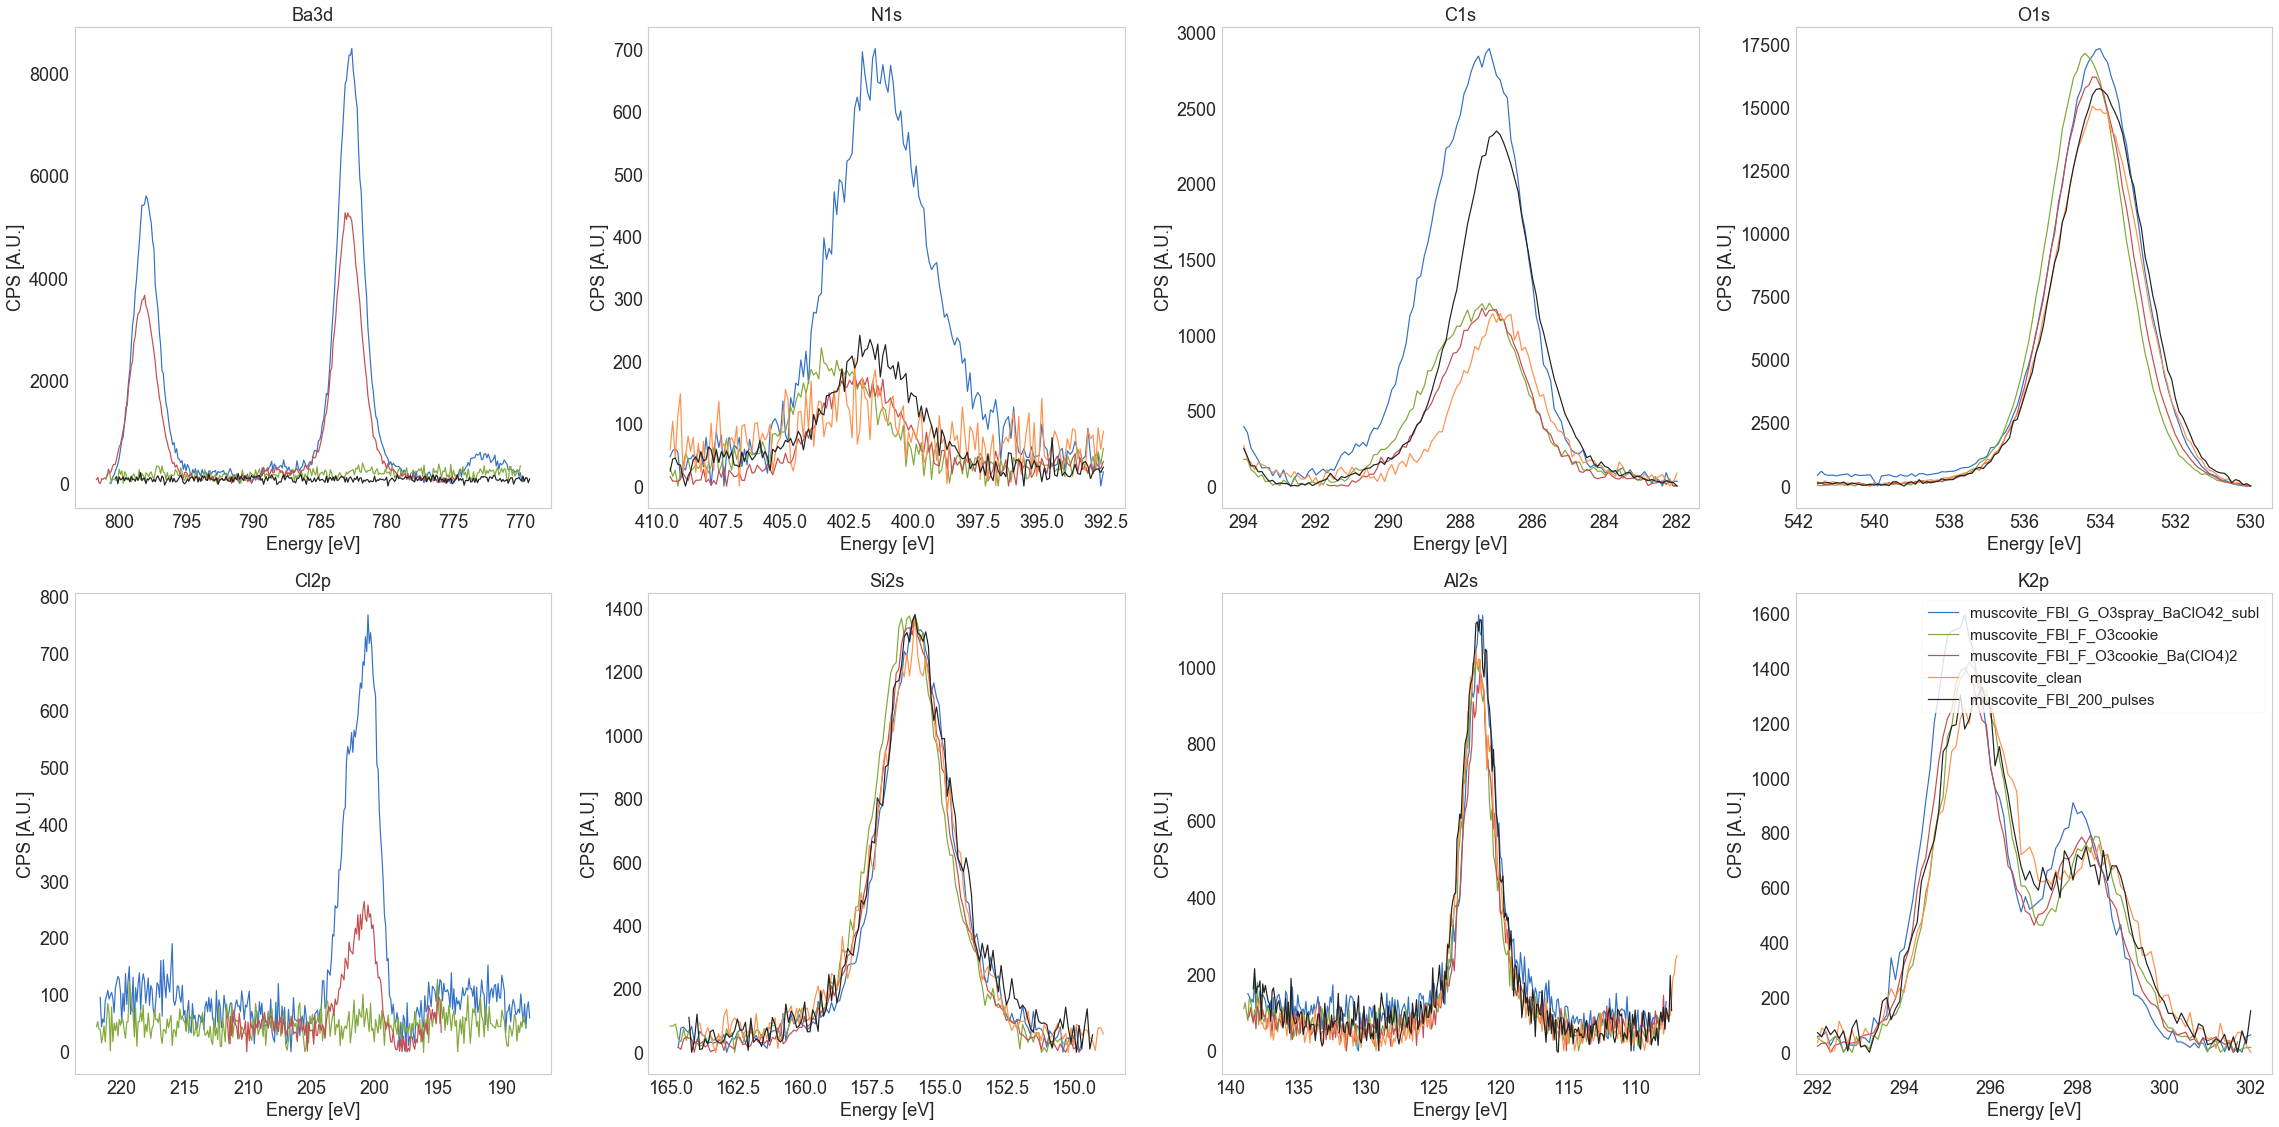

In [39]:
plot_xp_regions(proc_exps, regions, ncols=4)

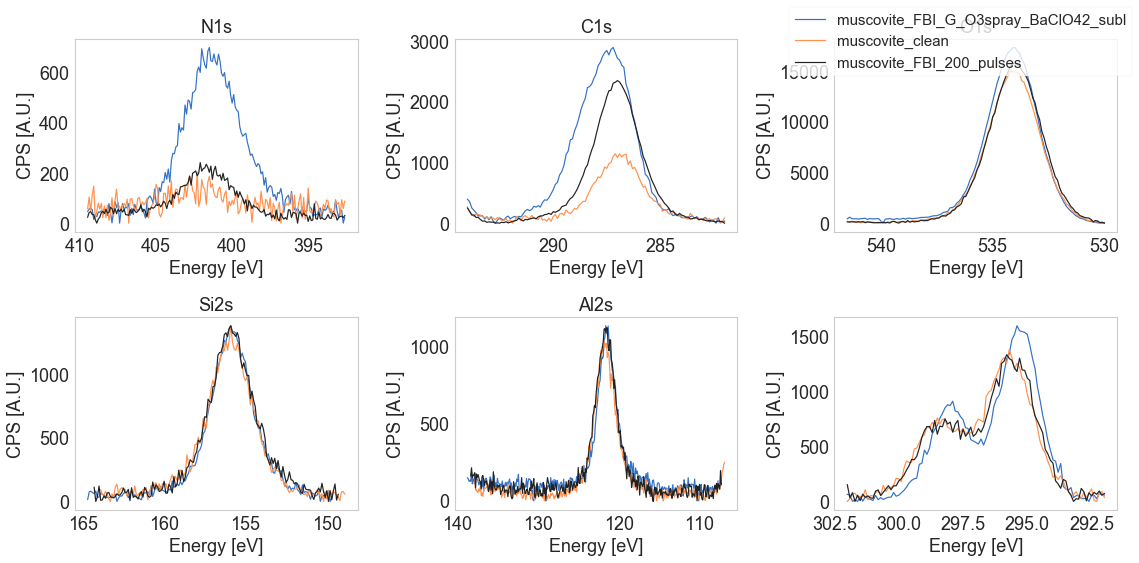

In [16]:
plot_xp_regions([proc_exps[0]]+proc_exps[3:5], regions, ncols=3)

### Only FBI injections

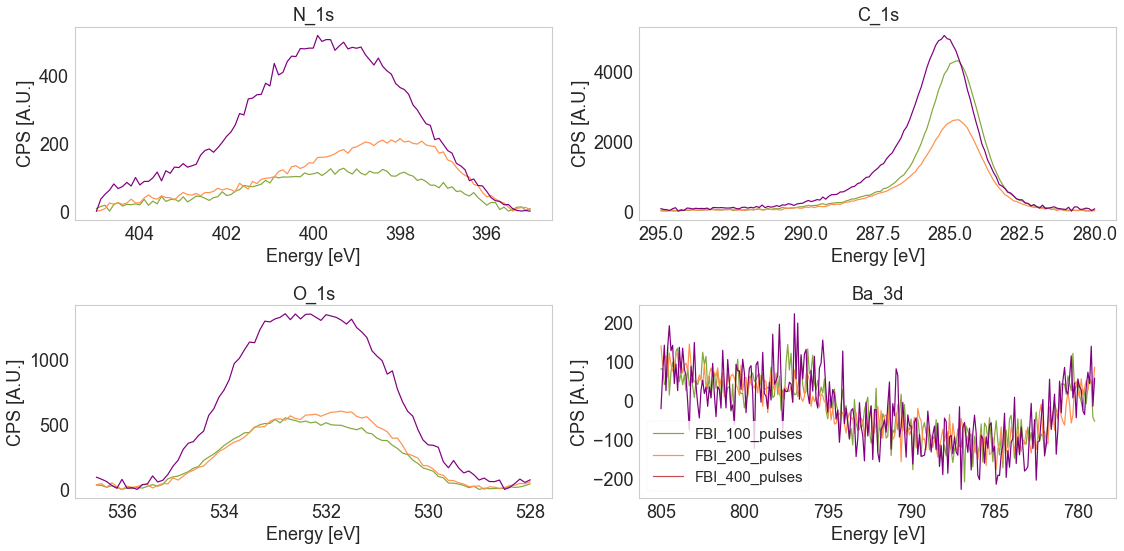

In [21]:
colors = ['g','y', 'purple']
plot_xp_regions([proc_exps[1]]+[proc_exps[3]] + [proc_exps[-1]], regions, colors, ncols=2)

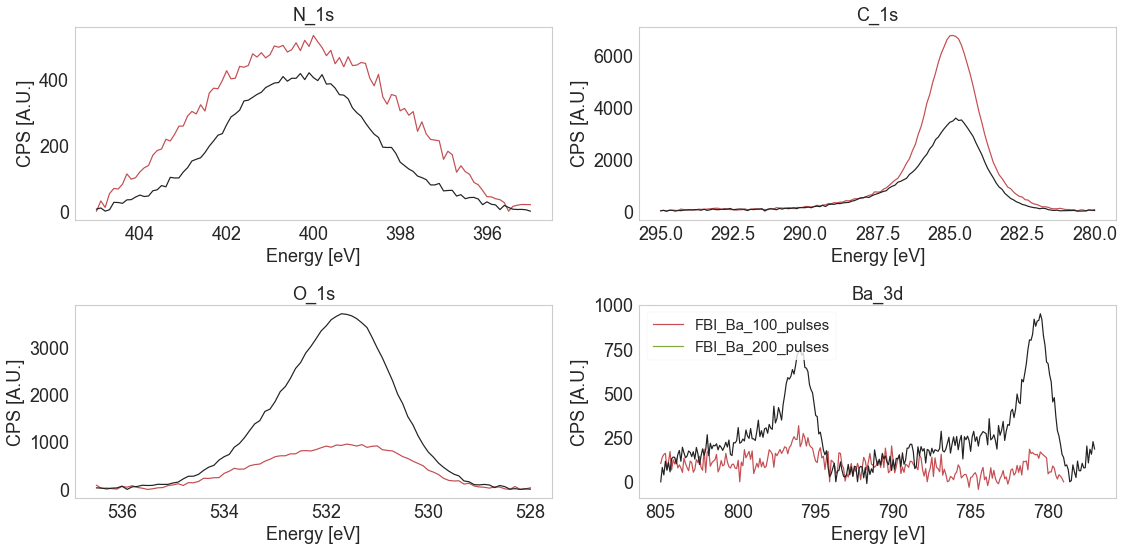

In [22]:
colors = ['r','k']
plot_xp_regions([proc_exps[2]]+[proc_exps[4]] , regions, colors, ncols=2)

### Subtracted clean Cu:

In [17]:
regions = ['N_1s', 'C_1s', 'O_1s', 'Cu_2p', 'Ba_3d', 'Cl_2p']

In [46]:
def plot_subtr_region(xp:XPS_experiment, xpRef: XPS_experiment, region: str, lb : str = None, ax = None):
    x = xp.dfx[region].energy.dropna().values
    y = xp.dfx[region].counts.dropna().values - xpRef.dfx[region].counts.dropna().values

    if lb == None: lb = xp.name + ' - '+ xpRef.name +', ' + region
    if ax == None: ax = plt.gca()
    p1 = ax.plot(x, y, label=lb)
    cosmetics_plot()
    return p1[0]


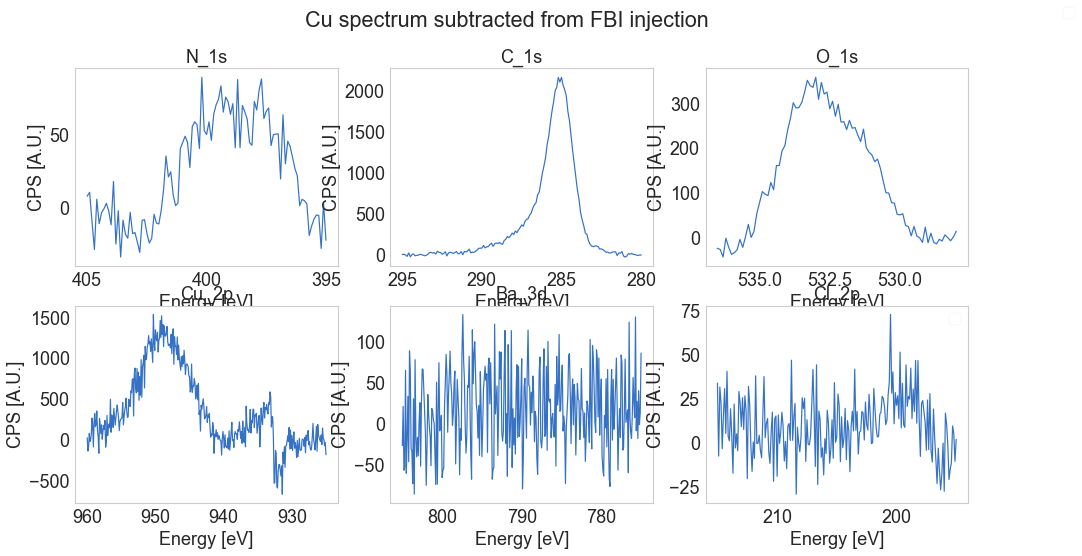

In [51]:
ncols = 3
rows = int(np.ceil(len(regions) / ncols))

fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
for i,r in enumerate(regions):
    j, k = i//ncols, i%ncols            
    li = plot_subtr_region(proc_exps[1], proc_exps[0], r, ax=ax[j][k], lb='__nolabel__')
    
    ax[j][k].set_title(r)
    cosmetics_plot(ax=ax[j][k], leg = False);
#     if len(proc_exps)%2 == 0:
#         ax[j][k].invert_xaxis()
plt.suptitle('Cu spectrum subtracted from FBI injection')

fig.legend()

### Only Ba 3d region

NameError: name 'cols' is not defined

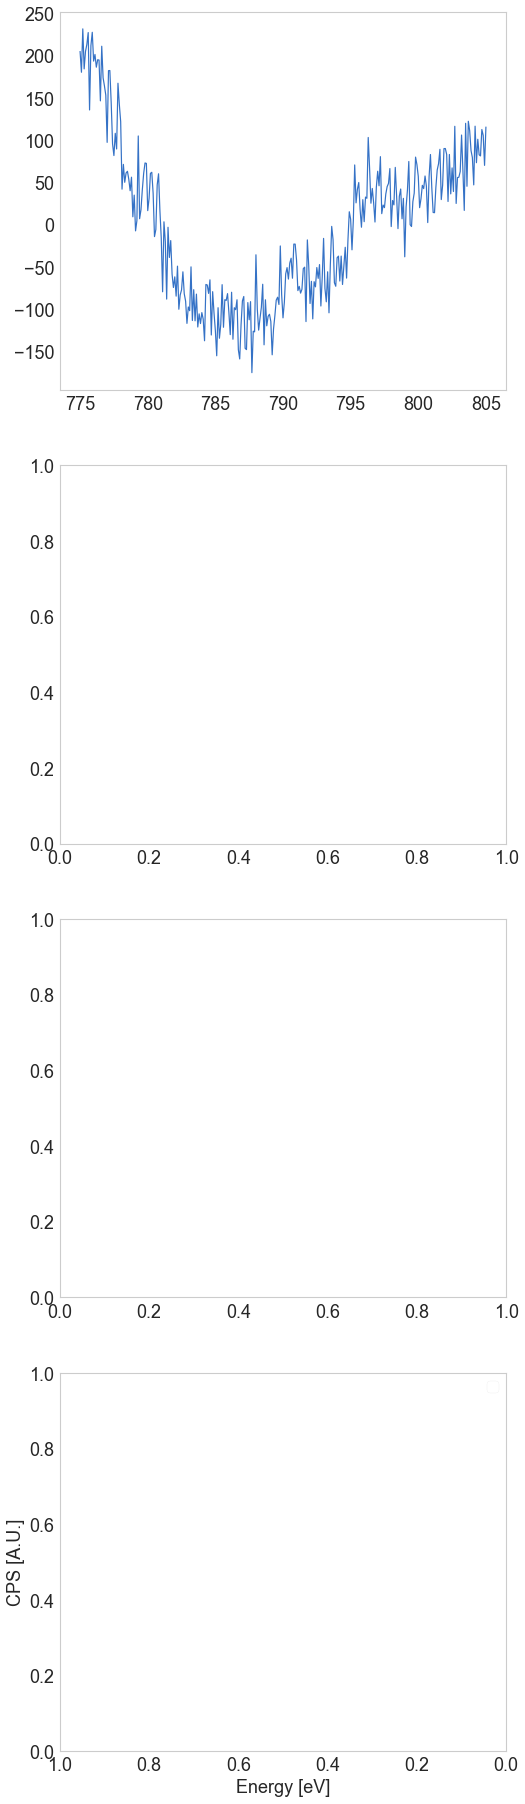

In [17]:
fig, ax = plt.subplots(4, 1, figsize=(8, 32))
for i,xp in enumerate(proc_exps):
    plot_region(xp, 'Ba_3d', ax=ax[i]).set_color(cols[i])
    ax[i].set_title(xp.name)
    cosmetics_plot(ax=ax[i], leg=False)
ax[i].get_legend().remove()

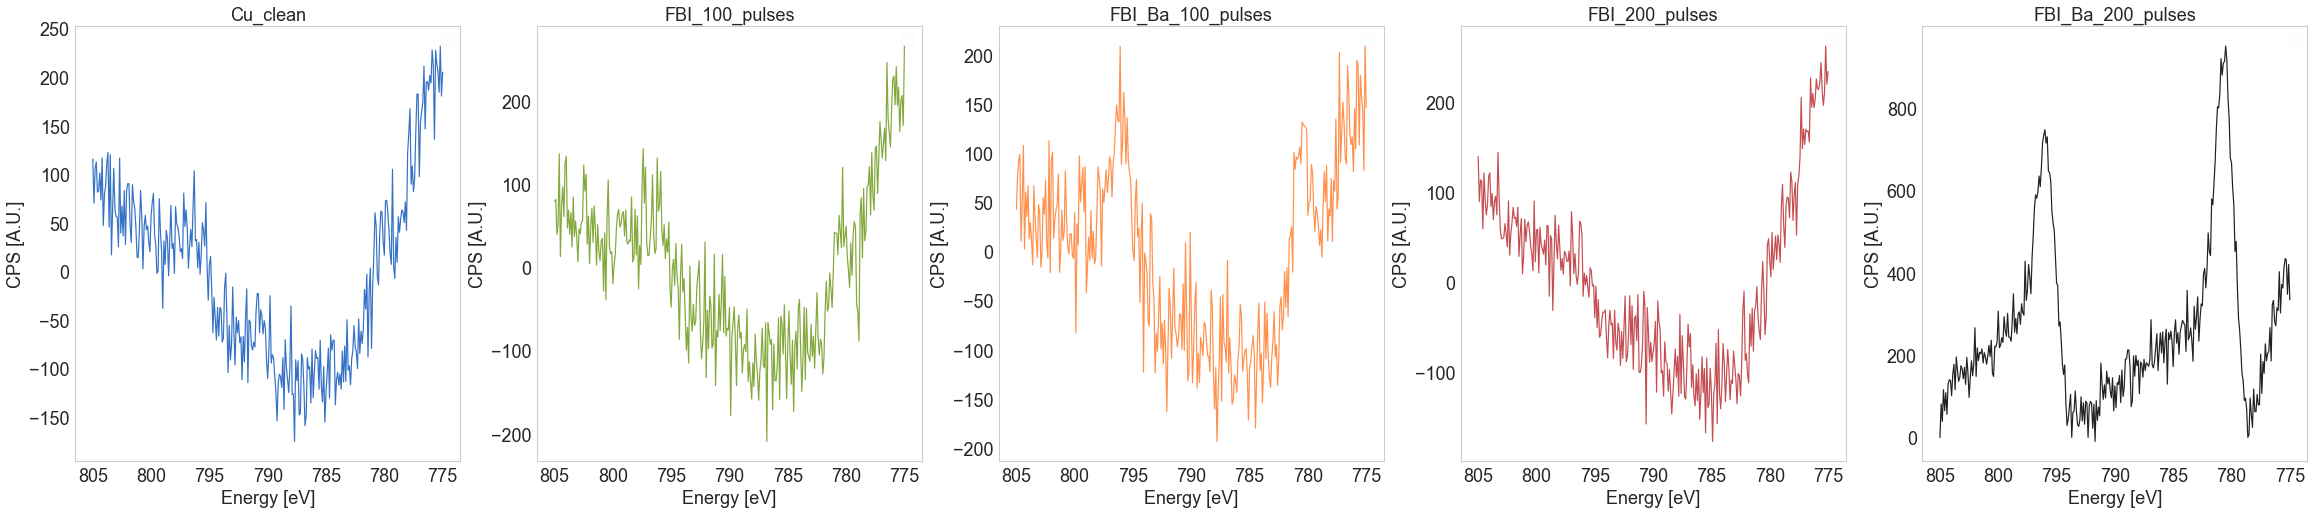

In [20]:
colors = ['b', 'g', 'y', 'r', 'k']
fig, ax = plt.subplots(1, 5, figsize=(40, 8))
for i,xp in enumerate(proc_exps):
#     if i == len(regions) - 1:   # Set labels from last region
    li = plot_region(xp, 'Ba_3d', ax=ax[i], lb='__nolabel__')
    if len(colors) > 0: li.set_color(colors[i])
    ax[i].set_title(xp.name)
    cosmetics_plot(ax=ax[i])
cosmetics_plot(ax=ax[i])

# plt.tight_layout()

### Normalized spectra

In [11]:
def plot_normal_regions(experiments : list, regions : list):
    """Subplots all normalized regions of a list of experiments"""
    rows = int(np.ceil(len(regions) / 3))
    cols = 3
    fig, ax = plt.subplots(rows, cols, figsize=(16, 8))
    for i,r in enumerate(regions):
        for xp in experiments:
            xp_norm = normalise_dfx(xp, inplace=False)
            j, k = i//3, i%3
            if i == len(experiments):   # Set labels from last region
                plot_region(xp_norm, r, ax=ax[j][k], lb=xp_norm.name)
                ax[j][k].set_title('Au_4f')
            else:
                plot_region(xp_norm, r, ax=ax[j][k], lb='__nolabel__')
                ax[j][k].set_title(r)
            cosmetics_plot(ax=ax[j][k], leg = False);
        if len(regions)%2 == 0:
            ax[j][k].invert_xaxis()
    plt.tight_layout()
    fig.legend()

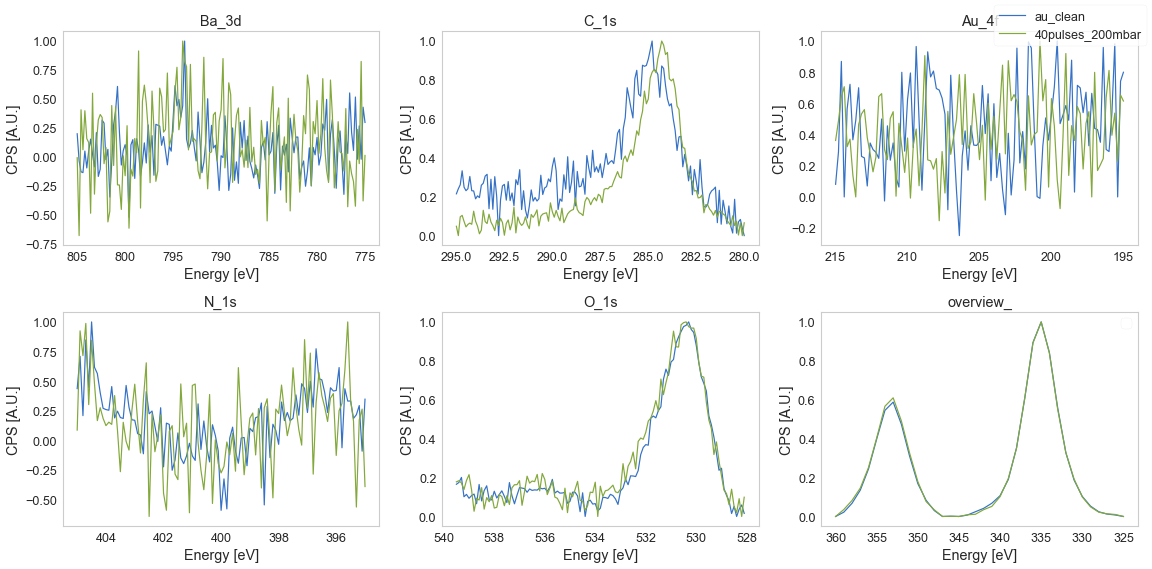

In [15]:
plot_normal_regions(proc_exps[:2], regions)

In [ ]:
plot_normal_regions(proc_exps[:2], regions)

## Integrate areas 

In [15]:
for xp in proc_exps:
    xp.area = {}

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:55: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


<Figure size 460.8x403.2 with 0 Axes>

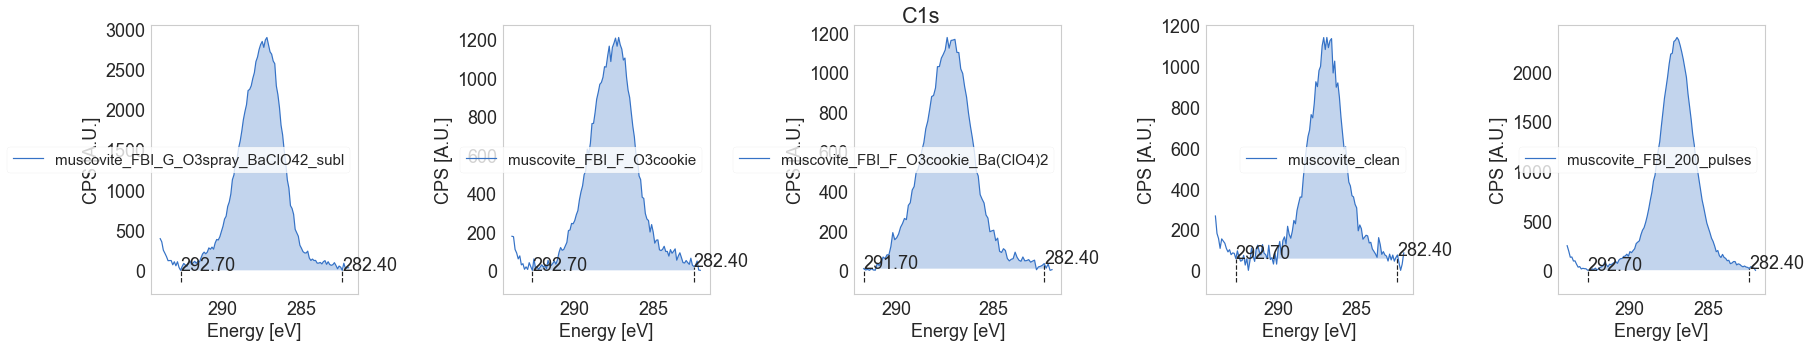

In [16]:
region = 'C1s'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### O 1s

<Figure size 460.8x403.2 with 0 Axes>

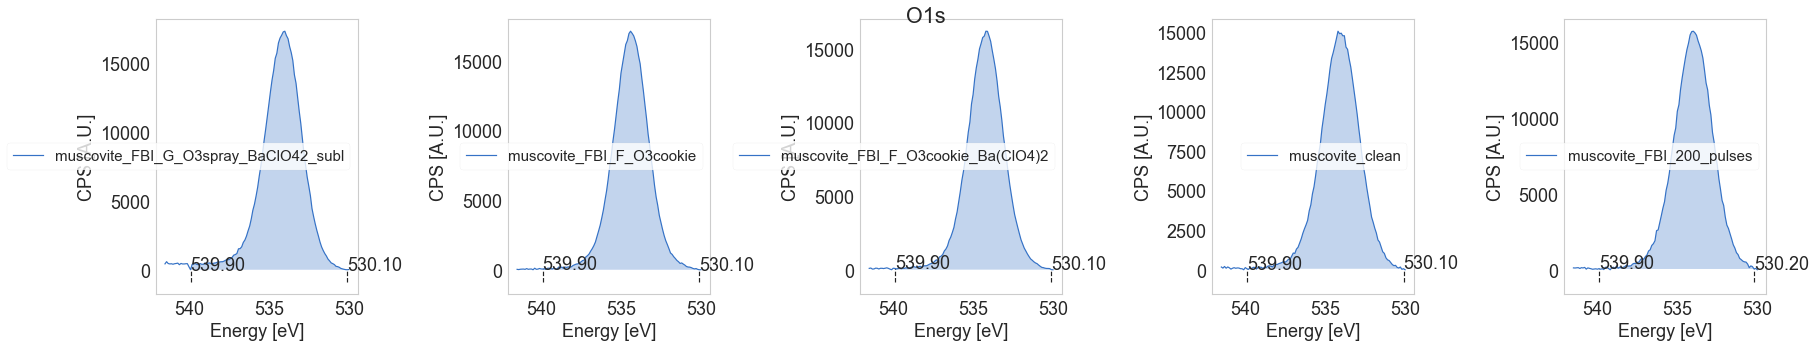

In [17]:
region = 'O1s'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### N 1s

<Figure size 460.8x403.2 with 0 Axes>

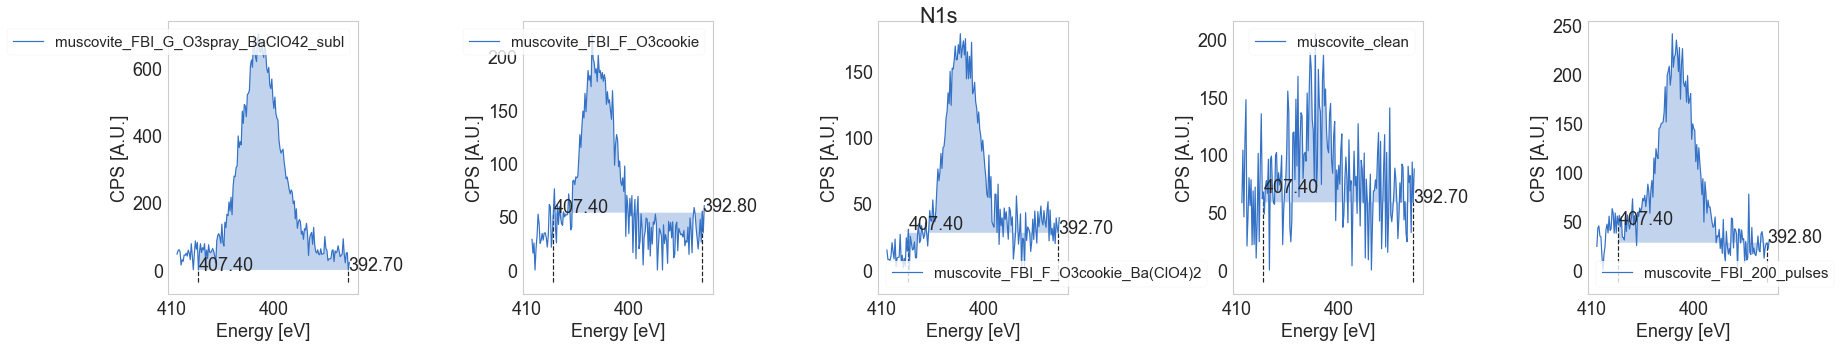

In [18]:
region = 'N1s'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Si 2s

<Figure size 460.8x403.2 with 0 Axes>

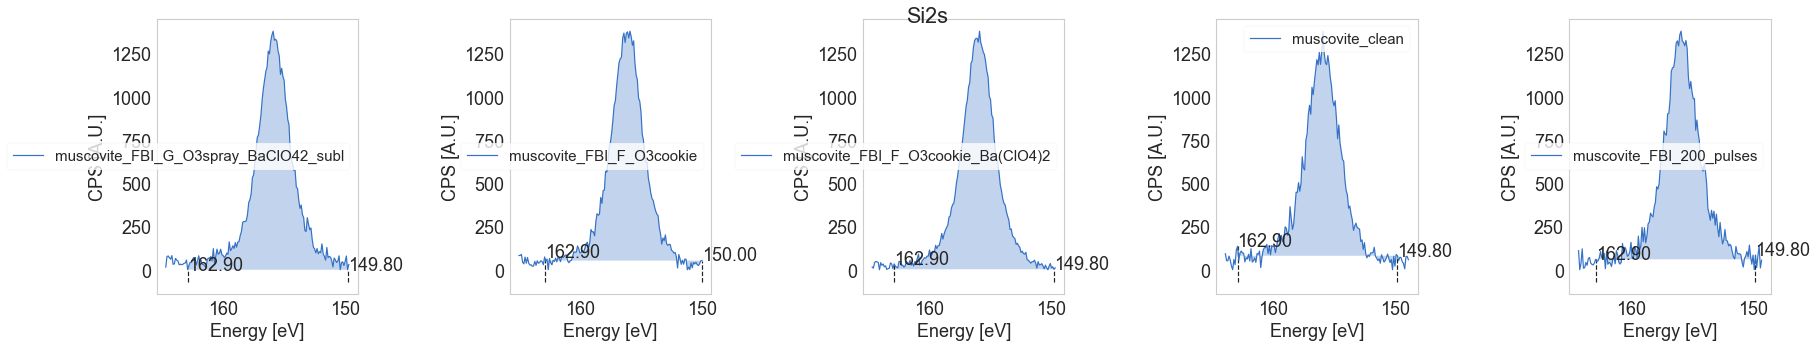

In [19]:
region = 'Si2s'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Al 2s

<Figure size 460.8x403.2 with 0 Axes>

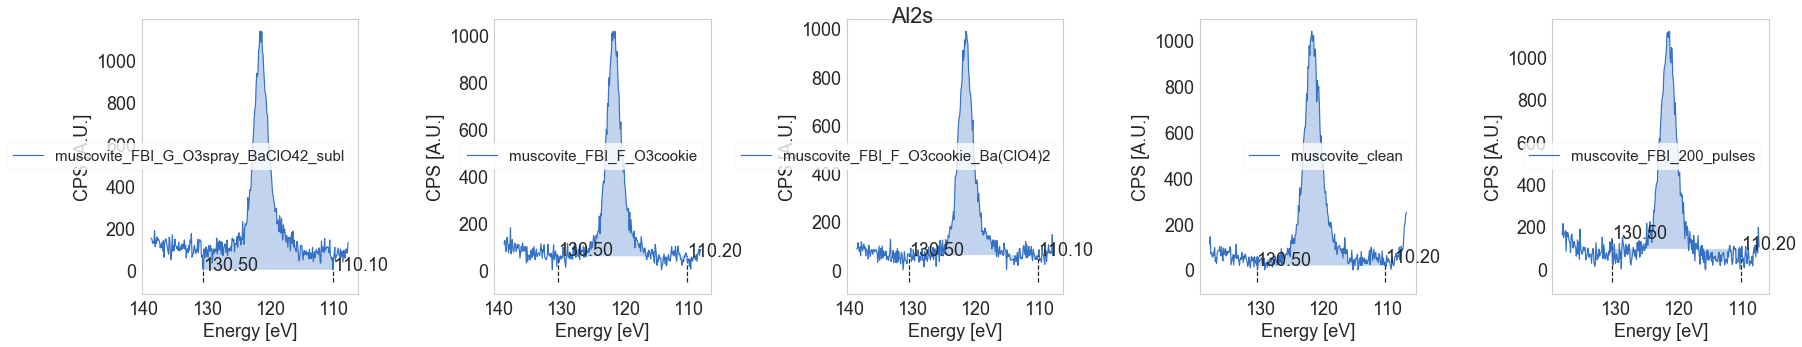

In [20]:
region = 'Al2s'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### K 2p

<Figure size 460.8x403.2 with 0 Axes>

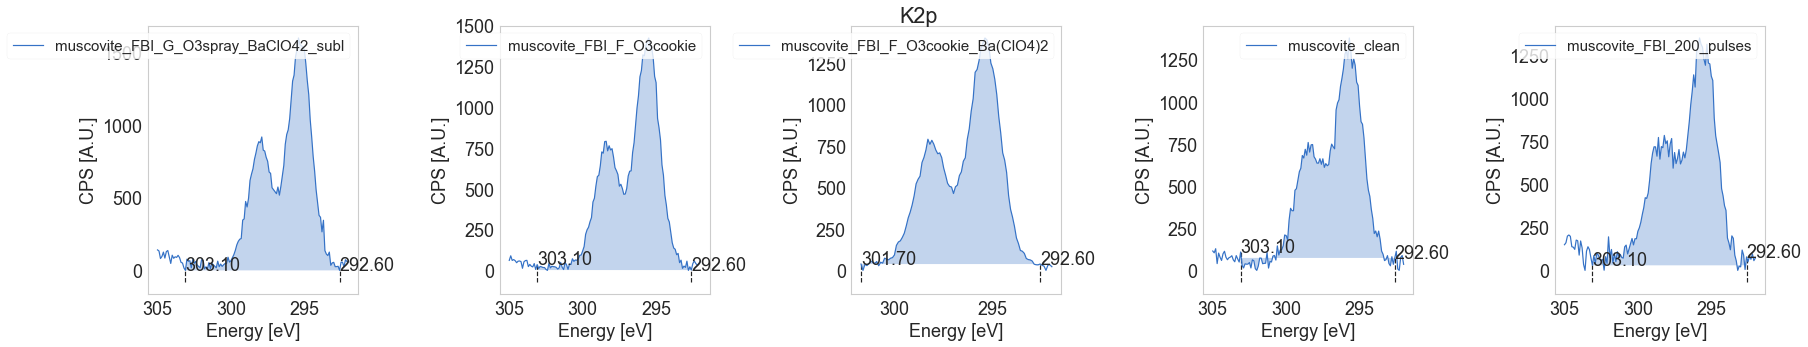

In [23]:
region = 'K2p'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Cl 2p

'Cl2p' region does not exist in muscovite_clean
'Cl2p' region does not exist in muscovite_FBI_200_pulses


<Figure size 460.8x403.2 with 0 Axes>

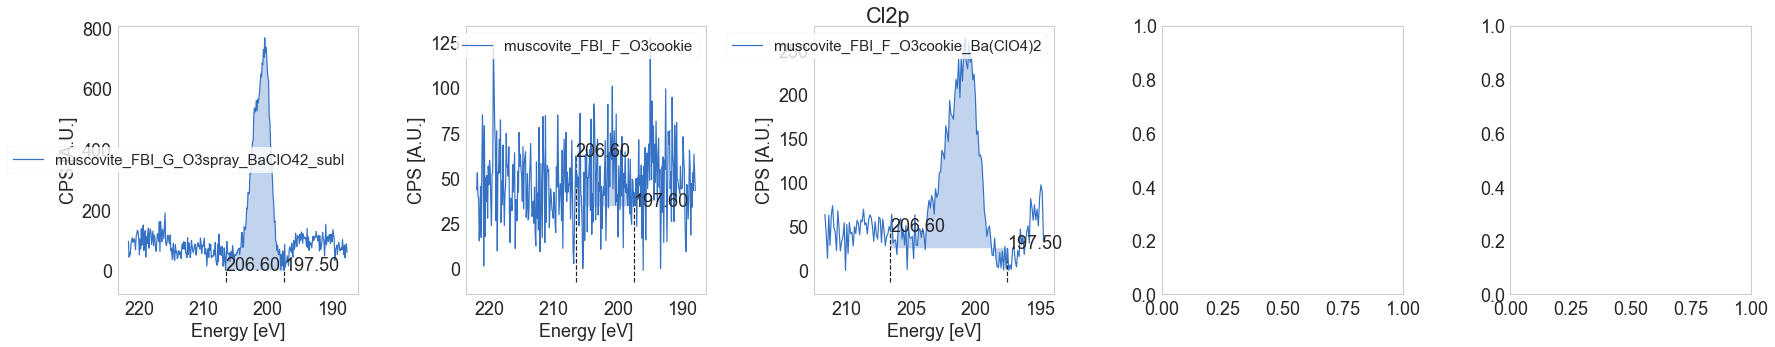

In [25]:
region = 'Cl2p'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Ba 3d

'Ba3d' region does not exist in muscovite_clean


<Figure size 460.8x403.2 with 0 Axes>

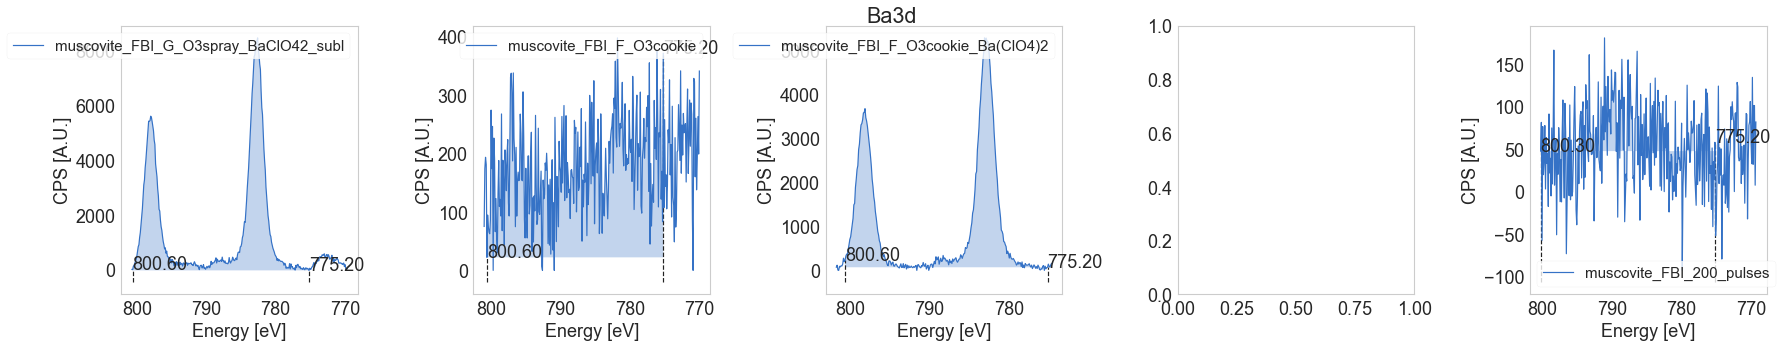

In [26]:
region = 'Ba3d'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

## Stoichiometry 

In [21]:
num, denom = (('N1s', 'C1s', 'C1s', 'Si2s' ), ('O1s', 'N1s', 'O1s', 'N1s'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	N/O	C/N	C/O	Si/N	
muscovite_FBI_G_O3spray_BaClO42_subl	0.11	 4.35	 0.46	 1.94	 
muscovite_FBI_F_O3cookie	0.04	 6.07	 0.22	 6.27	 
muscovite_FBI_F_O3cookie_Ba(ClO4)2	0.03	 6.15	 0.20	 7.00	 
muscovite_clean	0.04	 4.50	 0.19	 5.60	 
muscovite_FBI_200_pulses	0.04	 8.64	 0.34	 5.97	 


In [28]:
num, denom = (('O1s', 'N1s', 'C1s', 'Cl2p'), ('Ba3d', 'Ba3d', 'Ba3d', 'Ba3d' ))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	O/Ba	N/Ba	C/Ba	Cl/Ba	
muscovite_FBI_G_O3spray_BaClO42_subl	14.46	 1.53	 6.63	 0.58	 
muscovite_FBI_F_O3cookie	107.00	 3.89	 23.62	 0.82	 
muscovite_FBI_F_O3cookie_Ba(ClO4)2	19.02	 0.61	 3.77	 0.30	 


/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:547: RuntimeWarning: divide by zero encountered in double_scalars
  row += ('%.2f\t ' %(xp.area[i]/xp.area[j]))


ZeroDivisionError: division by zero

In [24]:
num, denom = (('Al2s', 'Si2s', 'O1s' ), ('K2p', 'K2p', 'K2p'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	Al/K	Si/K	O/K	
muscovite_FBI_G_O3spray_BaClO42_subl	5.78	 4.16	 20.36	 
muscovite_FBI_F_O3cookie	5.25	 4.67	 20.49	 
muscovite_FBI_F_O3cookie_Ba(ClO4)2	5.15	 4.54	 20.13	 
muscovite_clean	4.96	 4.40	 18.50	 
muscovite_FBI_200_pulses	5.43	 4.42	 18.69	 


Muscovite formula: $KAl_2(AlSi_3O_{10})(F,OH)_2$
- Al/K = 3
- Si/K = 3
- O/K = 12

In [79]:
1/59.82

0.01671681711802073

In [146]:
wCl = 31/13
noCl = 31/5
measure = 3.73
ratio_ba = (measure - wCl) / (noCl - wCl)

In [149]:
31/ 58
ratio_ba/0.53

0.6653225806451613

### (With subtracted  substrate O)

In [65]:
num, denom = (('C_1s', 'C_1s', 'C_1s', 'C_1s'), ('O_1s', 'Au_4f', 'Ba_3d', 'N_1s'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	C_/O_	C_/Au_	C_/Ba_	C_/N_	
au_clean	2.05	 0.10	 158.84	 21.91	 
40pulses_200mbar	13.11	 0.28	 236.80	 67.58	 
120pulses_200mbar	11.05	 0.28	 235.77	 -186.52	 
80pulses_200mbar	10.68	 0.29	 754.16	 105.63	 


# Analysis FBI on ITO

Clean, 100 and 400 ALI pulses, Ba(ClO$_4)_2$ sublimation

In [16]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49,
           'In3d5/2' : 4.359, 'Sn3d5/2' : 4.725, 'Cl2p' : 0.891})

## Read processed experiments

In [48]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/**/*.xy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if ('/proc' in f):
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/proc/03082020_ITO_FBI_1e-4M_400pulses_BaClO42_subl.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/proc/20072020_ITO_Clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/proc/20072020_ITO_FBI_100pulses.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/proc/28072020_ITO_FBI_1e-4M_400pulses.xy']

In [49]:
proc_exps = []
for f in files:
    proc_exps.append(read_processed_xp(f))

## Show individual plots

In [7]:
proc_exps[0].dfx.columns

MultiIndex(levels=[['Ba3d', 'C1s', 'Cl2p', 'Cl2s', 'In3d5/2', 'N1s', 'O1s', 'Sn3d5/2', 'overview_21.5'], ['counts', 'energy']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['range', 'properties'])

In [10]:
regions = proc_exps[0].dfx.columns.levels[0].values
regions= ['N1s', 'C1s', 'O1s', 'In3d5/2']

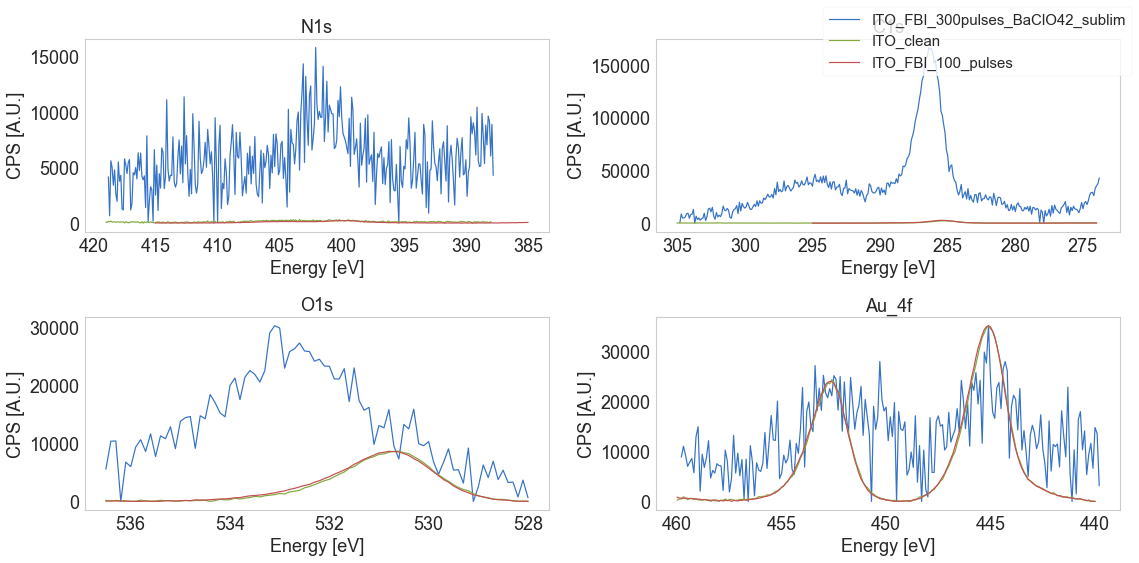

In [11]:
colors = ['b', 'g', 'r', 'y', 'k', 'purple']
plot_xp_regions(proc_exps[:3], regions, colors, ncols=2)

In [17]:
regions = ['N_1s', 'C_1s', 'O_1s', 'Cu_2p', 'Ba_3d', 'Cl_2p']

In [46]:
def plot_subtr_region(xp:XPS_experiment, xpRef: XPS_experiment, region: str, lb : str = None, ax = None):
    x = xp.dfx[region].energy.dropna().values
    y = xp.dfx[region].counts.dropna().values - xpRef.dfx[region].counts.dropna().values

    if lb == None: lb = xp.name + ' - '+ xpRef.name +', ' + region
    if ax == None: ax = plt.gca()
    p1 = ax.plot(x, y, label=lb)
    cosmetics_plot()
    return p1[0]


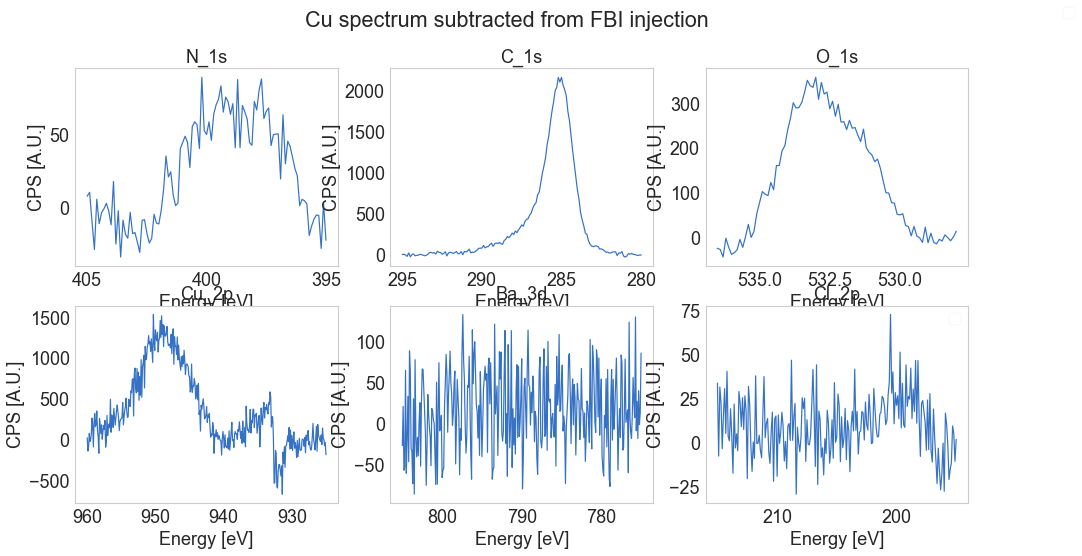

In [51]:
ncols = 3
rows = int(np.ceil(len(regions) / ncols))

fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
for i,r in enumerate(regions):
    j, k = i//ncols, i%ncols            
    li = plot_subtr_region(proc_exps[1], proc_exps[0], r, ax=ax[j][k], lb='__nolabel__')
    
    ax[j][k].set_title(r)
    cosmetics_plot(ax=ax[j][k], leg = False);
#     if len(proc_exps)%2 == 0:
#         ax[j][k].invert_xaxis()
plt.suptitle('Cu spectrum subtracted from FBI injection')

fig.legend()

## Integrate areas 

In [50]:
for xp in proc_exps:
    xp.area = {}

In [78]:
def integrateRegions(exps: list, region : str, indRef: int, asf: dict, lb : str = None, flag_fill : bool = True):
    """Integrate peaks for a list of experiments between two minima automatically located for exps[indRef]
    The boundary are fixed for the whole list."""

    ind = flexible_integration_limits(exps[indRef], region=region, doublePeak=0, flag_plot=False)
    lmidx, rmidx = ind[-2:] # The index of the minima are always the last two 
    plt.clf()

    xRef = exps[indRef].dfx[region].dropna().energy     # Use the energy array of reference xp to crop the other xp's

    fig, ax = plt.subplots(1, len(exps), figsize=(len(exps)*5, 5) )
    area = []
    for i, xp in enumerate(exps):
        try:
            y = xp.dfx[region].dropna().counts
        except KeyError as e:          #Check the region exists in this xp
            print(e, 'region does not exist in ' + xp.name)
            xp.area.update({region: 0})
            continue
            
        x = xp.dfx[region].dropna().energy
        ax[i].plot(x, y, label=xp.name)
        
        xpCrop = crop_spectrum(xp, region, eup = xRef[lmidx], edw = xRef[rmidx])
        yc = xpCrop.dfx[region].dropna().counts.values
        xc = xpCrop.dfx[region].dropna().energy.values    # Integrate only in the cropped range 

        step = x[0] - x[1]
        area.append(np.trapz(yc, dx=step))
        
        try:
            xp.area.update({region : area[-1]/asf[region]})
        except (KeyError, NameError) as e:
            print(e, ', returning raw area')
            pass

        if flag_fill:
            if yc[0] > yc[-1]:     
                ax[i].fill_between(xc , y1 = yc[-1], y2 = yc, alpha=0.3)
            else:
                ax[i].fill_between(xc, y1 = yc[0], y2 = yc, alpha=0.3)
            ybase = ax[i].get_ylim()[0]

            for j in [0, -1]:
                ax[i].vlines(xc[j], ymin=ybase, ymax=yc[j], linestyles='--')
                ax[i].text(s='%.2f'%xc[j], x = xc[j], y = yc[j])
        cosmetics_plot(ax=ax[i])
    plt.tight_layout()
    fig.suptitle(region)
    return area

### C 1s

<Figure size 460.8x403.2 with 0 Axes>

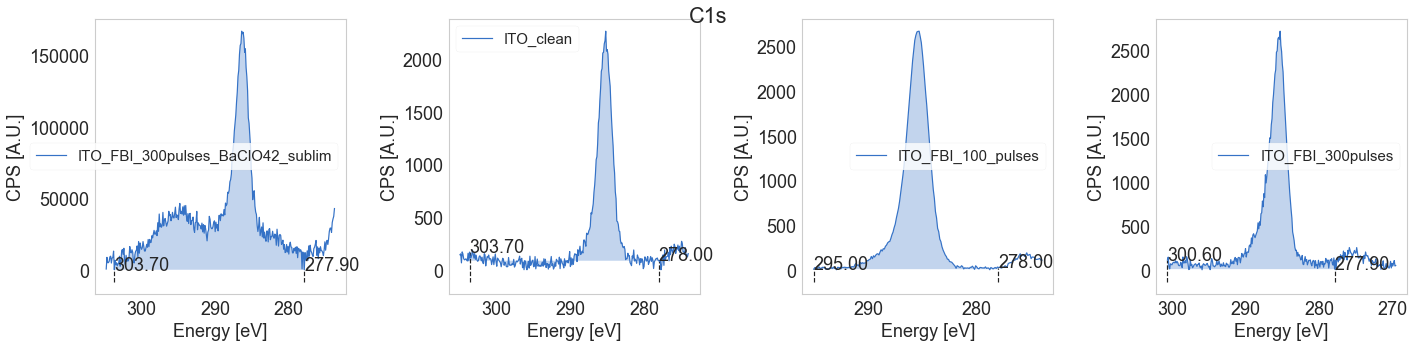

In [59]:
areas = integrateRegions(proc_exps, 'C1s', indRef=0, asf=asf)

In [52]:
proc_exps[0].area

{'C1s': 3187506.8022074783}

### O 1s

<Figure size 460.8x403.2 with 0 Axes>

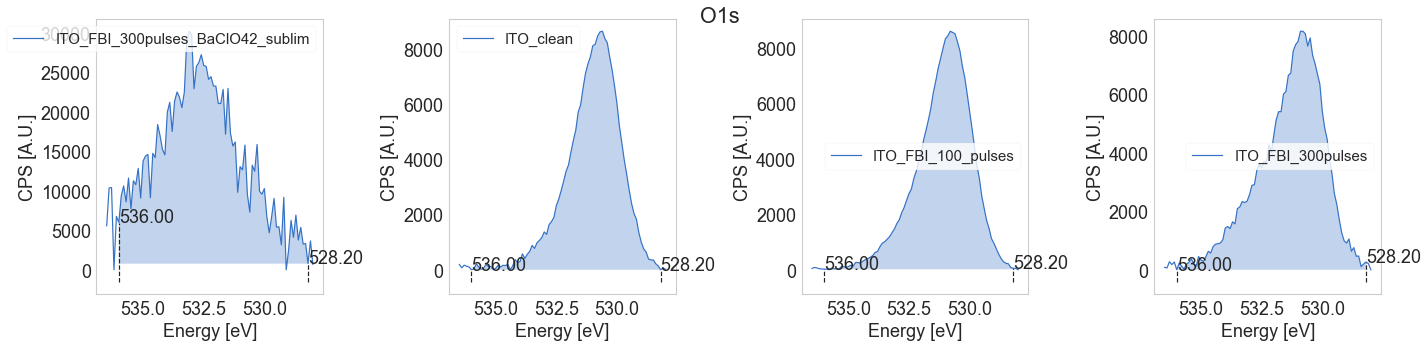

In [53]:
region = 'O1s'
areas = integrateRegions(proc_exps, region, indRef=1, asf=asf)

### N 1s

<Figure size 460.8x403.2 with 0 Axes>

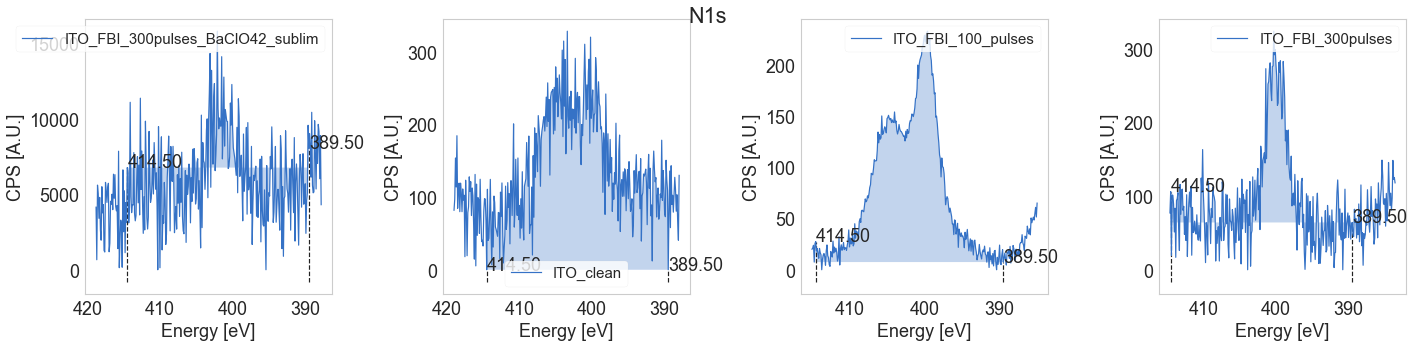

In [58]:
region = 'N1s'
areas = integrateRegions(proc_exps, region, indRef=1, asf=asf)

### Ba 3d

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:55: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


'Ba3d' in ITO_clean
'Ba3d' in ITO_FBI_100_pulses


<Figure size 460.8x403.2 with 0 Axes>

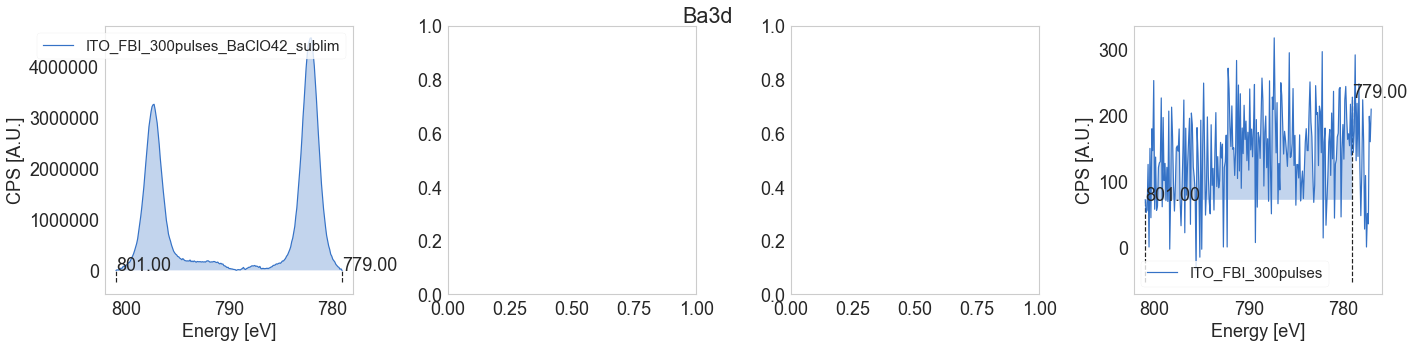

In [69]:
region = 'Ba3d'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

In [70]:
proc_exps[1].area

{'C1s': 24727.372099521475,
 'O1s': 29306.537795717097,
 'N1s': 7755.94334075967,
 'In3d5/2': 32702.104401694505,
 'Ba3d': 0}

### Cl 2p

'Cl2p' in ITO_clean
'Cl2p' in ITO_FBI_100_pulses
'Cl2p' in ITO_FBI_300pulses


<Figure size 460.8x403.2 with 0 Axes>

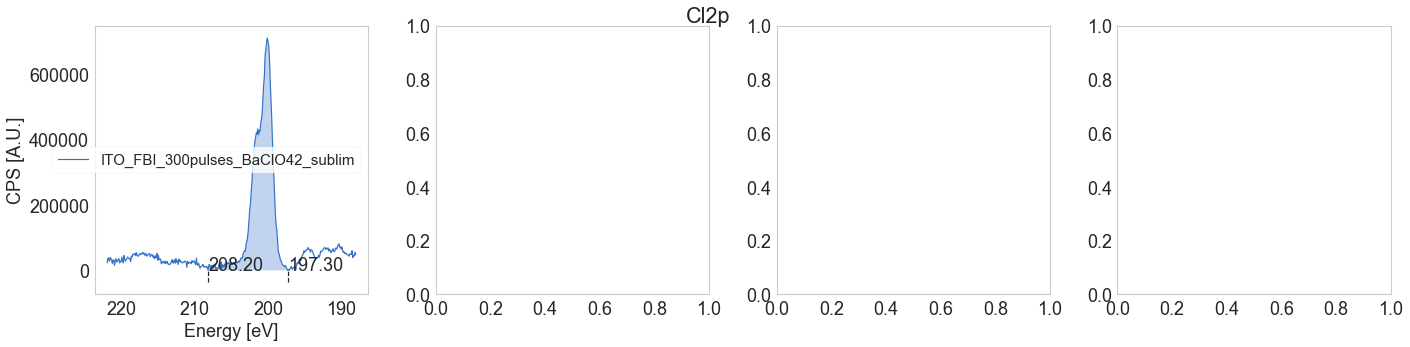

In [71]:
region = 'Cl2p'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Cl 2s

'Cl2s' , returning raw area
'Cl2s' in ITO_clean
'Cl2s' , returning raw area
'Cl2s' in ITO_FBI_300pulses


<Figure size 460.8x403.2 with 0 Axes>

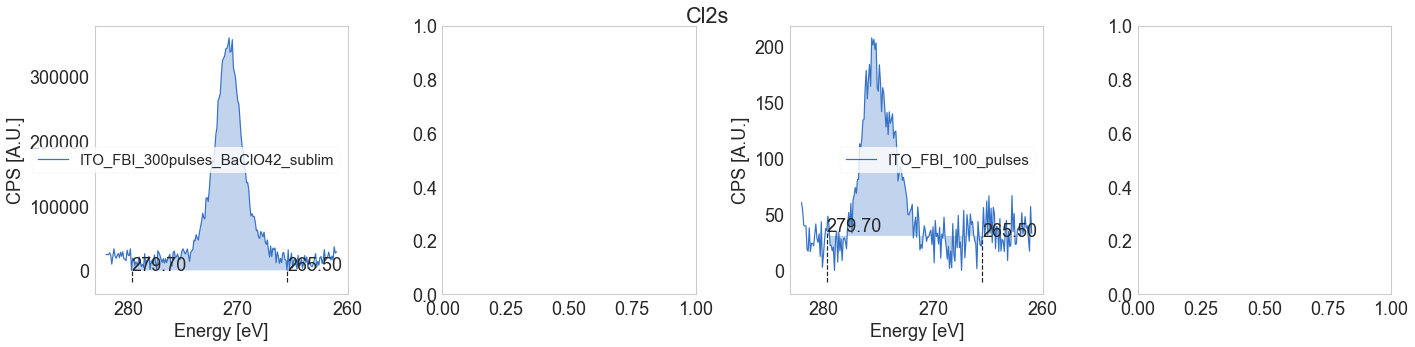

In [72]:
region = 'Cl2s'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### In 3d

<Figure size 460.8x403.2 with 0 Axes>

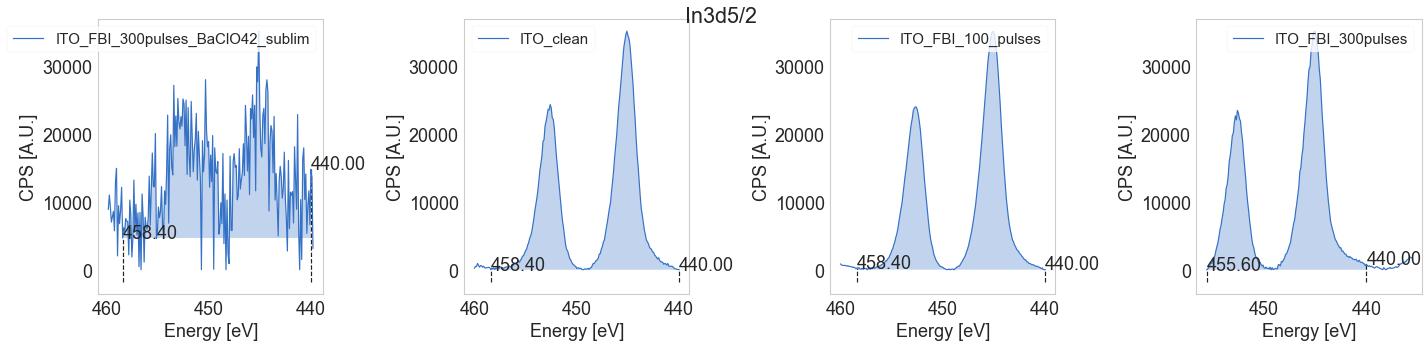

In [64]:
region = 'In3d5/2'
areas = integrateRegions(proc_exps, region, indRef=1, asf=asf)

### Sn 3d

<Figure size 460.8x403.2 with 0 Axes>

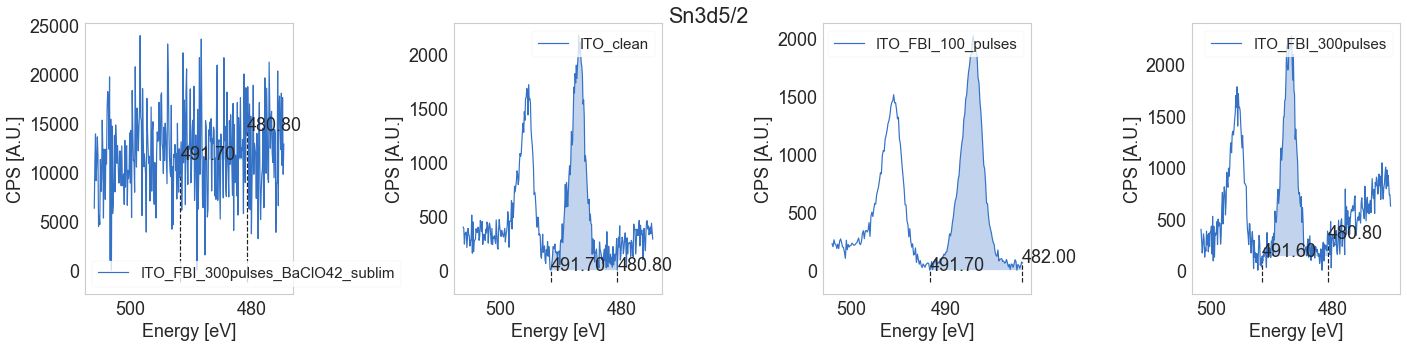

In [77]:
region = 'Sn3d5/2'
areas = integrateRegions(proc_exps, region, indRef=1, asf=asf)

In [73]:
proc_exps[1].area

{'C1s': 24727.372099521475,
 'O1s': 29306.537795717097,
 'N1s': 7755.94334075967,
 'In3d5/2': 32702.104401694505,
 'Ba3d': 0,
 'Cl2p': 0,
 'Cl2s': 0}

## Stoichiometry 

In [75]:
num, denom = (('N1s', 'C1s', 'C1s', 'N1s' ), ('O1s', 'N1s', 'O1s', 'In3d5/2'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	N/O	C/N	C/O	N/In	
ITO_FBI_300pulses_BaClO42_sublim	2.03	 9.92	 20.11	 5.53	 
ITO_clean	0.26	 3.19	 0.84	 0.24	 
ITO_FBI_100_pulses	0.13	 6.24	 0.83	 0.12	 
ITO_FBI_300pulses	0.15	 6.23	 0.93	 0.15	 


In [76]:
num, denom = (('Ba3d', 'Cl2p', 'Ba3d' ), ('N1s', 'N1s', 'In3d5/2'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	Ba/N	Cl/N	Ba/In	
ITO_FBI_300pulses_BaClO42_sublim	7.22	 6.45	 39.96	 
ITO_clean	0.00	 0.00	 0.00	 
ITO_FBI_100_pulses	0.00	 0.00	 0.00	 
ITO_FBI_300pulses	0.09	 0.00	 0.01	 


# Analysis FBI on quartz

# Analysis FBI on muscovite
clean, 200 ALI pulses and cookie dipping
At $t_{on}$ = 50 ms and C = 1µM

## Read processed experiments

In [29]:
path = '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/**/*.xy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if ('/proc' in f):
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/proc/07082020_quartz_A_FBI_drop.xy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/proc/07082020_quartz_A_FBI_drop_BaClO42_sublim.xy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/proc/10082020_quartz_atmosphere.xy']

In [30]:
proc_exps = []
for f in files:
    proc_exps.append(read_processed_xp(f))

## Integrate areas 

In [31]:
for xp in proc_exps:
    xp.area = {}

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:55: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


<Figure size 460.8x403.2 with 0 Axes>

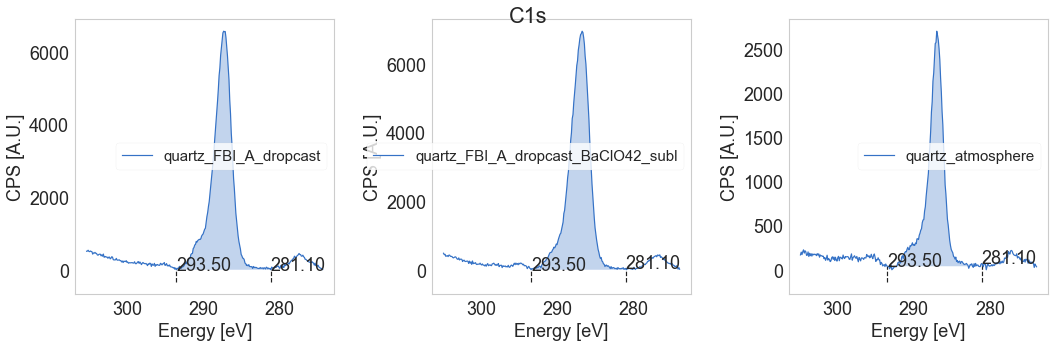

In [32]:
region = 'C1s'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### O 1s

<Figure size 460.8x403.2 with 0 Axes>

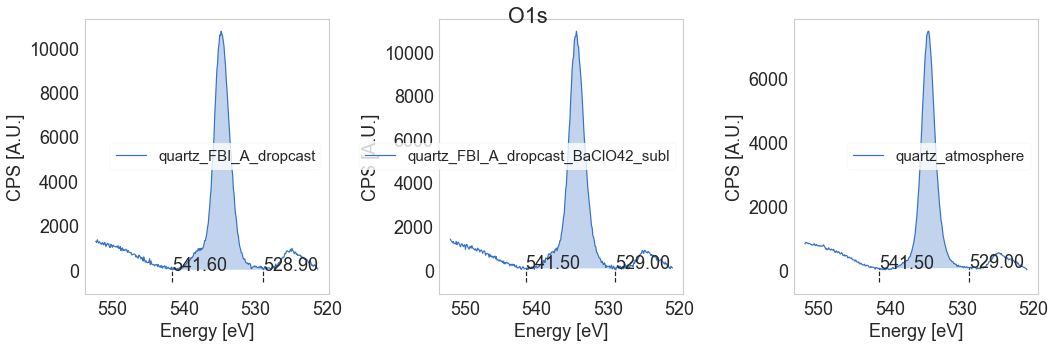

In [33]:
region = 'O1s'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### N 1s

<Figure size 460.8x403.2 with 0 Axes>

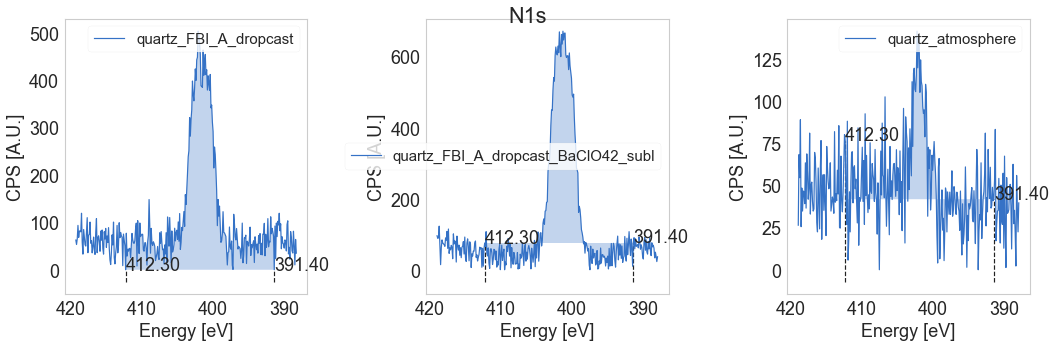

In [34]:
region = 'N1s'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Si 2s

<Figure size 460.8x403.2 with 0 Axes>

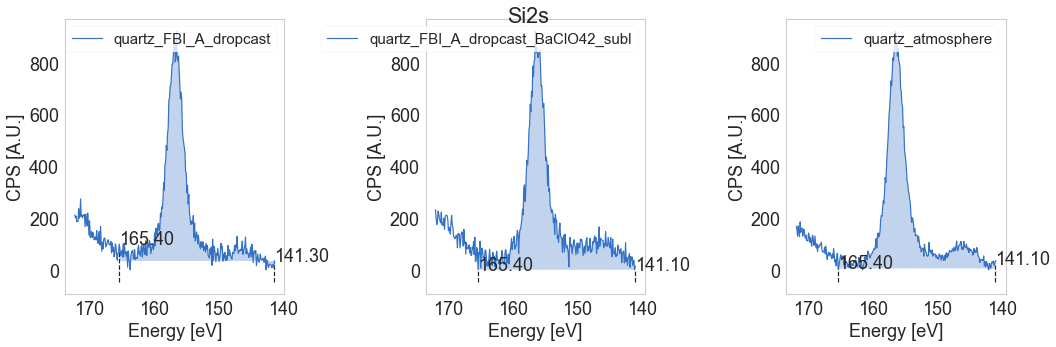

In [37]:
region = 'Si2s'
areas = integrateRegions(proc_exps, region, indRef=1, asf=asf)

### Cl 2p

<Figure size 460.8x403.2 with 0 Axes>

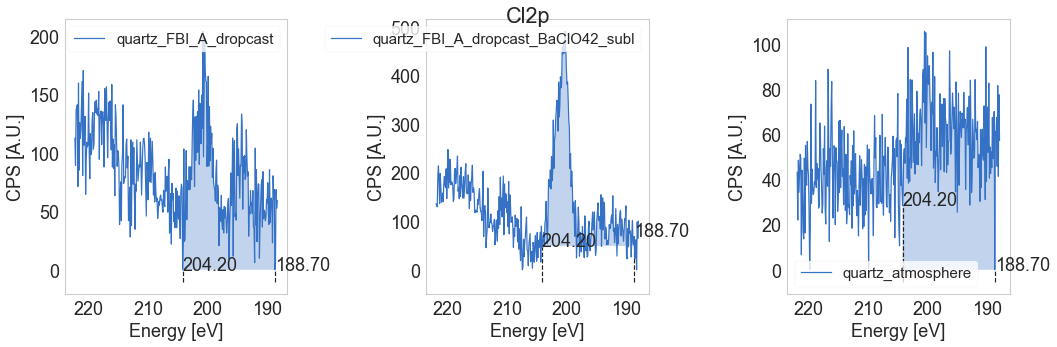

In [38]:
region = 'Cl2p'
areas = integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Ba 3d

Text(0.5, 0.98, 'Ba3d')

<Figure size 460.8x403.2 with 0 Axes>

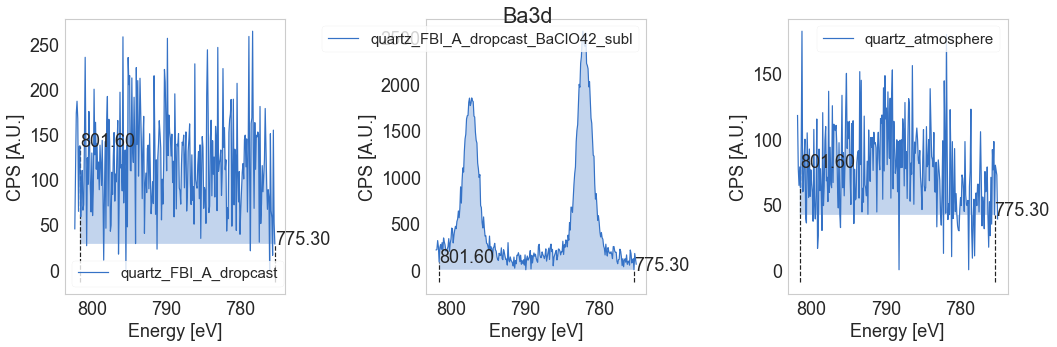

In [48]:
region = 'Ba3d'
# areas = integrateRegions(proc_exps, region, indRef=1, asf=asf)
ind = flexible_integration_limits(proc_exps[1], region, doublePeak=-1)
lmidx, rmidx = ind[-2:] # The index of the minima are always the last two
exps = proc_exps
flag_fill = True
plt.clf()

xRef = exps[1].dfx[region].dropna().energy     # Use the energy array of reference xp to crop the other xp's

fig, ax = plt.subplots(1, len(exps), figsize=(len(exps)*5, 5) )
area = []
for i, xp in enumerate(exps):
    try:
        y = xp.dfx[region].dropna().counts
    except KeyError as e:          #Check the region exists in this xp
        print(e, 'region does not exist in ' + xp.name)
        xp.area.update({region: 0})
        continue

    x = xp.dfx[region].dropna().energy
    ax[i].plot(x, y, label=xp.name)

    xpCrop = crop_spectrum(xp, region, eup = xRef[lmidx], edw = xRef[rmidx])
    yc = xpCrop.dfx[region].dropna().counts.values
    xc = xpCrop.dfx[region].dropna().energy.values    # Integrate only in the cropped range

    step = x[0] - x[1]
    area.append(np.trapz(yc, dx=step))

    try:
        xp.area.update({region : area[-1]/asf[region]})
    except (KeyError, NameError) as e:
        print(e, ', returning raw area')
        pass

    if flag_fill:
        if yc[0] > yc[-1]:
            ax[i].fill_between(xc , y1 = yc[-1], y2 = yc, alpha=0.3)
        else:
            ax[i].fill_between(xc, y1 = yc[0], y2 = yc, alpha=0.3)
        ybase = ax[i].get_ylim()[0]

        for j in [0, -1]:
            ax[i].vlines(xc[j], ymin=ybase, ymax=yc[j], linestyles='--')
            ax[i].text(s='%.2f'%xc[j], x = xc[j], y = yc[j])
    cosmetics_plot(ax=ax[i])
plt.tight_layout()
fig.suptitle(region)

## Stoichiometry 

In [41]:
num, denom = (('N1s', 'C1s', 'C1s', 'Si2s' ), ('O1s', 'N1s', 'O1s', 'N1s'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	N/O	C/N	C/O	Si/N	
quartz_FBI_A_dropcast	0.12	 11.81	 1.46	 2.18	 
quartz_FBI_A_dropcast_BaClO42_subl	0.15	 10.83	 1.63	 1.90	 
quartz_atmosphere	0.09	 9.67	 0.85	 4.88	 


In [49]:
num, denom = (('O1s', 'N1s', 'C1s', 'Cl2p'), ('Ba3d', 'Ba3d', 'Ba3d', 'Ba3d' ))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	O/Ba	N/Ba	C/Ba	Cl/Ba	
quartz_FBI_A_dropcast	104.87	 12.96	 153.01	 3.22	 
quartz_FBI_A_dropcast_BaClO42_subl	23.43	 3.52	 38.11	 1.33	 
quartz_atmosphere	96.23	 8.48	 82.03	 3.91	 
